<a href="https://colab.research.google.com/github/Aleena24/AML_lab/blob/main/2348503_prg4_poly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv('/content/Program_4_Dataset.csv')
df.head()

,index,OS_Time_Stamp,Temperature,Pressure,Humidity,TimeStamp
0,0,1456761674,17.7,1015.2,76.4,2016-03-01 00:01:14+08:00
1,1,1456761733,17.7,1015.3,76.4,2016-03-01 00:02:13+08:00
2,2,1456761792,17.7,1015.3,76.5,2016-03-01 00:03:12+08:00
3,3,1456761853,17.7,1015.3,76.7,2016-03-01 00:04:13+08:00
4,4,1456761912,17.6,1015.2,76.8,2016-03-01 00:05:12+08:00


In [25]:
df.isnull().sum()

index            0
OS_Time_Stamp    0
Temperature      0
Pressure         0
Humidity         0
TimeStamp        0
dtype: int64

In [26]:
x = df['Temperature'].values.reshape(-1, 1)
y = df['Pressure'].values.reshape(-1, 1)

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [28]:
degree = 5
poly_features = PolynomialFeatures(degree = degree)
x_train_poly = poly_features.fit_transform(x_train)
x_test_poly = poly_features.transform(x_test)

In [29]:
model = LinearRegression()
model.fit(x_train_poly, y_train)

LinearRegression()

In [30]:
y_pred = model.predict(x_test_poly)

In [31]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error",mse)

Mean Squared Error 22.5095000565956


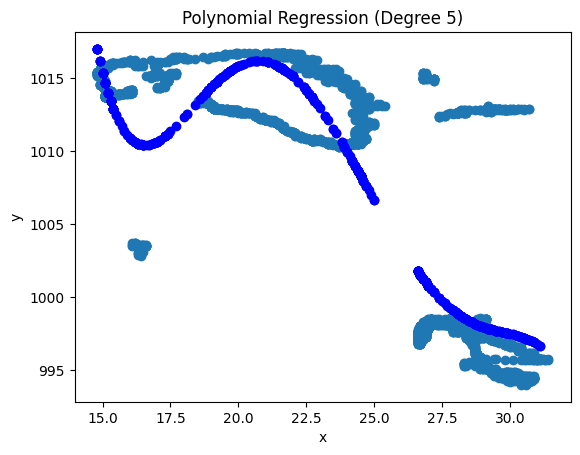

In [32]:
plt.scatter(x, y, label = 'Orginal')
plt.scatter(x_test, y_pred, label = 'Predictions', color='blue')
plt.title(f'Polynomial Regression (Degree {degree})')
plt.xlabel('x')
plt.ylabel('y')
plt.show()